# Hola &#x1F600;,

Soy **Hesus Garcia** – , tu revisor de confianza, también conocido como **"El Hesus que lleva la H de 'héroe' del código" 🦸‍♂️**. Sí, soy el único Hesus con H que te ayudará a llevar tu trabajo al siguiente nivel. Estoy preparado con observaciones y sugerencias que harán que tu proyecto destaque y esté a la altura de las mejores prácticas en desarrollo. ¡Prepárate para mejorar y brillar en el mundo del código! 🚀

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

--- 

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


Omar Mancilla Martínez

# Proyecto Final: 

### Objetivos:

- pronosticar la tasa de cancelación de clientes
- generar un modelo que prediga que clientes planean abanoar el servicio
    - Determinar la curva AUC-ROC de dicho modelo
    - Determinar la exactitud del modelo

## Plan de Trabajo
Plan de trabajo para el proyecto final de Tripleten.

## EDA
Iniciamos con la un análisis exploratorio de los datos para entender la información que tenemos y determinar el plan a seguir.

Objetivos del EDA: 
- Entender las cuatro fuentes de datos que tenemos.
- Revisar la calidad de las fuentes de datos
- Generar un diccionario de datos
- Determinar que pre-procesamiento es necesario
- Encontrar tendencias generales en los datos
- Determinar el desbalance de clases


### Carga de datos:
Cargaremos las librerias pertinentes y los datos en archivos CSV.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier



from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [2]:
df_personal = pd.read_csv("./datasets/personal.csv")
df_phone = pd.read_csv("./datasets/phone.csv ")
df_contract = pd.read_csv("./datasets/contract.csv")
df_internet = pd.read_csv("./datasets/internet.csv")

Ahora exploraremos los dataframes a traves de las siguientes funciones:

In [3]:
def explore(df):
    display(df.head())
    print(df.info())
    print("\n shape:", df.shape)
    display(df.describe())
    print("Cantidad de datos nulos:\n", df.isnull().sum(), "\n")

    print("Valores comunes:")
    for columna in df.columns:
        print(f"Valores más comunes en la columna '{columna}':")
        print(df[columna].value_counts())

In [4]:

def plot_raincloud(df):
    # Verify all columns are numeric
    if not all(pd.api.types.is_numeric_dtype(df[col]) for col in df.columns):
        raise ValueError(
            "All columns in the DataFrame must be numeric to create a raincloud plot.")

    fig, ax = plt.subplots(figsize=(8, 4))

    # Iterate over each column in the DataFrame and create a raincloud plot
    for idx, (column, data) in enumerate(df.items()):
        # Boxplot for each feature
        bp = ax.boxplot([data], patch_artist=True,
                        vert=False, positions=[idx + 1])
        bp['boxes'][0].set_facecolor(
            'yellowgreen' if idx % 2 == 0 else 'olivedrab')
        bp['boxes'][0].set_alpha(0.4)

        # Violin plot for each feature
        vp = ax.violinplot([data], points=500, showmeans=False, showextrema=False,
                           showmedians=False, vert=False, positions=[idx + 1])
        vp['bodies'][0].get_paths()[0].vertices[:, 1] = np.clip(
            vp['bodies'][0].get_paths()[0].vertices[:, 1], idx + 1, idx + 2)
        vp['bodies'][0].set_color('thistle' if idx % 2 == 0 else 'orchid')

        # Scatter plot for each feature with jitter
        y = np.full(len(data), idx + 1) + \
            np.random.uniform(low=-0.05, high=0.05, size=len(data))
        ax.scatter(data, y, s=0.3, c='tomato' if idx %
                   2 == 0 else 'darksalmon')

    ax.set_yticks(np.arange(1, len(df.columns) + 1))
    ax.set_yticklabels(df.columns)
    plt.xlabel('Values')
    plt.title("Raincloud plot")
    plt.show()

#### Personal:

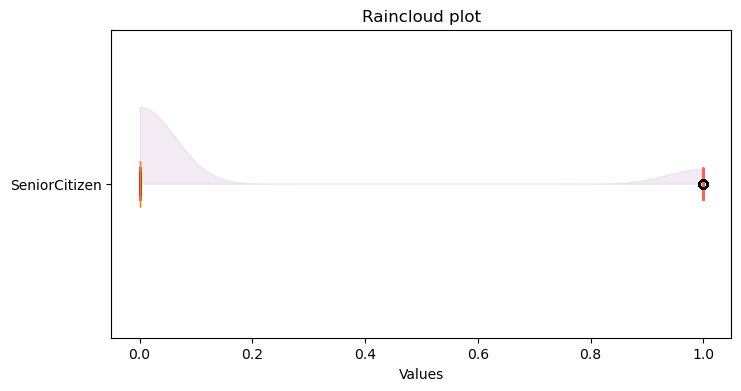

In [5]:
plot_raincloud(pd.DataFrame(df_personal["SeniorCitizen"]))

In [6]:
explore(df_personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

 shape: (7043, 5)


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Cantidad de datos nulos:
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64 

Valores comunes:
Valores más comunes en la columna 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Valores más comunes en la columna 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
Valores más comunes en la columna 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Valores más comunes en la columna 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Valores más comunes en la columna 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


##### Observaciones:
- Notamos que no tenemos valores nulos en el dataframe
- podemos codificar la mayoria de las columnas, pues son binarias. Como "gender", "partner", "seniorCitizen", 
- Solo el 16% son senior, segun SeniorCitizen

#### Contract:

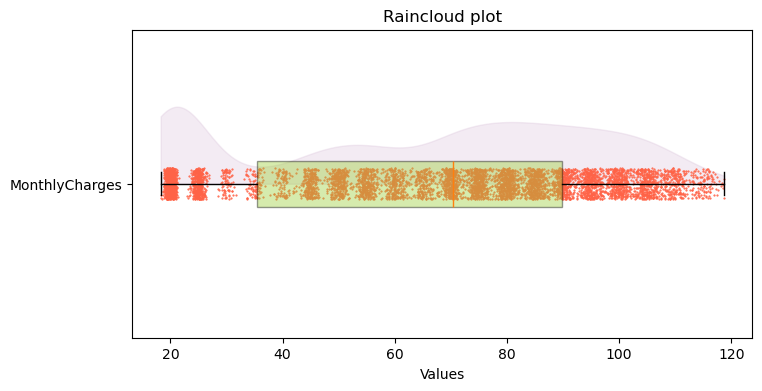

In [7]:
plot_raincloud(pd.DataFrame(df_contract["MonthlyCharges"]))

In [8]:
explore(df_contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

 shape: (7043, 8)


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Cantidad de datos nulos:
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64 

Valores comunes:
Valores más comunes en la columna 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Valores más comunes en la columna 'BeginDate':
BeginDate
2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: count, Length: 77, dtype: int64
Valores más comunes en la columna 'EndDate':
EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name:

##### Observaciones:
- Las columnas de fechas tienen un tipo incorrecto.
- ```TotalCharges``` tiene el tipo incorrecto y contiene valores invalidos ```" "```.
- ```Type,	PaperlessBilling,	PaymentMethod``` pueden ser codificados.
- ```MonthlyCharges``` parece estar distribuido de forma normal.
- ```EndDate``` usa "NO" para seleccionar clientes que no han terminado su contrato, evitando poder usar el formato correcto.

#### Internet:
No usaremos un raincloud plot, pues no hay columnas numericas.

In [9]:
explore(df_internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

 shape: (5517, 8)


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Cantidad de datos nulos:
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64 

Valores comunes:
Valores más comunes en la columna 'customerID':
customerID
7590-VHVEG    1
5181-OABFK    1
9356-AXGMP    1
5176-OLSKT    1
7508-DQAKK    1
             ..
1104-FEJAM    1
2972-YDYUW    1
4238-JSSWH    1
0869-PAPRP    1
3186-AJIEK    1
Name: count, Length: 5517, dtype: int64
Valores más comunes en la columna 'InternetService':
InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64
Valores más comunes en la columna 'OnlineSecurity':
OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64
Valores más comunes en la columna 'OnlineBackup':
OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64
Valores más comunes en la columna 'DeviceProtection':
DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64
Valor

##### Observaciones:
- No tenemos datos nulos
- Todas las columnas excepto el id de cliente, pueden ser codificadas.

#### Phone:
No crearemos un raincloud plot, pues no hay columnas numericas.

In [10]:
explore(df_phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

 shape: (6361, 2)


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


Cantidad de datos nulos:
 customerID       0
MultipleLines    0
dtype: int64 

Valores comunes:
Valores más comunes en la columna 'customerID':
customerID
5575-GNVDE    1
0980-FEXWF    1
8082-GHXOP    1
3393-FMZPV    1
8701-DGLVH    1
             ..
8197-BFWVU    1
9154-QDGTH    1
8499-BRXTD    1
8552-OBVRU    1
3186-AJIEK    1
Name: count, Length: 6361, dtype: int64
Valores más comunes en la columna 'MultipleLines':
MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64


##### Observaciones:
- No tenemos datos nulos
- La unica columna puede ser codificada.

### Dicciónario de datos:
Con lo explroado podemos generar el siguiente diccionario de datos:

- Personal.csv
    - CustomerID: Identificador unico de cada cliente
    - gender: genero del cliente
    - SeniorCitizen: estado de señoria del cleinte
    - Partner: Estado civil del cliente, yes: casado
    - Dependents: ¿El cliente tiene familia que dependa de el?
- Contract.csv
    - customerID: Identificador unico de cada cliente
    - BeginDate: Fecha en la que se firmo el contrato
    - EndDate: Fecha en la que se abandono el servició, "No" en caso de que no se haya abandonado.
    - Type: tipo de facturación
    - PaperlessBilling: formato de las facturas
    - PaymentMethod: Metodo de pago
    - MonthlyCharges: Cargos mensuales
    - TotalCharges: Cargos totales
- Internet.csv
    - CustomerID: Identificador unico de cada cliente
    - InternetService
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
- Phone.cvs
    - CustomerID: Identificador unico de cada cliente
    - MultipleLines: ¿El cliente tiene mas de una linea telefonica?

### Pre-procesamiento:
Aplicamos las observaciones a los respectivos datasets:

#### contract:  
Cambiaremos el formato de las fechas, igualmente cambiaremos "No" para los contratos no terminados, por una fecha futura.

In [11]:
df_contract["BeginDate"] = df_contract["BeginDate"].astype("datetime64[ms]")
df_contract["EndDate"] = (df_contract["EndDate"].replace(
    "No", "2025-01-01")).astype("datetime64[ms]")

Eliminamos los valores invalidos de "TotalCharges", debido a que solo tenemos 11 entradas y cambiamos el tipo de dato:

In [12]:

df_contract[df_contract["TotalCharges"] == " "].info()
df_contract = df_contract[df_contract["TotalCharges"].replace(
    " ", np.nan).notna()]

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 488 to 6754
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        11 non-null     object        
 1   BeginDate         11 non-null     datetime64[ms]
 2   EndDate           11 non-null     datetime64[ms]
 3   Type              11 non-null     object        
 4   PaperlessBilling  11 non-null     object        
 5   PaymentMethod     11 non-null     object        
 6   MonthlyCharges    11 non-null     float64       
 7   TotalCharges      11 non-null     object        
dtypes: datetime64[ms](2), float64(1), object(5)
memory usage: 792.0+ bytes


In [13]:
df_contract["TotalCharges"] = df_contract["TotalCharges"].astype("float64")
df_contract[df_contract["TotalCharges"] == " "]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


Con esto corroboramos que los datos son correctos:



In [14]:
df_contract.info()
df_contract

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ms]
 2   EndDate           7032 non-null   datetime64[ms]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ms](2), float64(2), object(4)
memory usage: 494.4+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2025-01-01,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,2014-02-01,2025-01-01,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,2019-03-01,2025-01-01,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60


### Enriquecimiento de datos:
Crearemos la columna churn en "df_contract", esta columna sera nuestro objetivo en los modelos.


In [15]:
df_contract["churn"] = df_contract["EndDate"].apply(
    lambda x: 1 if x < pd.to_datetime("2025-01-01")
    else 0)

### Dataframe maestro:

Crearemos un dataframe maestro con la intención de juntar la información a trabajar, esto a través de inner joins con el proposito de tener unicamente registros completos.


In [16]:
df_master = df_contract.merge(df_personal, how="inner", on="customerID")
df_master = df_master.merge(df_internet, how="inner", on="customerID")
df_master = df_master.merge(df_phone, how="inner", on="customerID")

df_master

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
1,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
2,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No
3,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,1,Female,...,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
4,1452-KIOVK,2018-04-01,2025-01-01,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,Male,...,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,8456-QDAVC,2018-07-01,2025-01-01,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,0,Male,...,No,No,Fiber optic,No,No,No,No,Yes,No,No
4828,6840-RESVB,2018-02-01,2025-01-01,One year,Yes,Mailed check,84.80,1990.50,0,Male,...,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
4829,2234-XADUH,2014-02-01,2025-01-01,One year,Yes,Credit card (automatic),103.20,7362.90,0,Female,...,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4830,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,1,Male,...,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [17]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        4832 non-null   object        
 1   BeginDate         4832 non-null   datetime64[ms]
 2   EndDate           4832 non-null   datetime64[ms]
 3   Type              4832 non-null   object        
 4   PaperlessBilling  4832 non-null   object        
 5   PaymentMethod     4832 non-null   object        
 6   MonthlyCharges    4832 non-null   float64       
 7   TotalCharges      4832 non-null   float64       
 8   churn             4832 non-null   int64         
 9   gender            4832 non-null   object        
 10  SeniorCitizen     4832 non-null   int64         
 11  Partner           4832 non-null   object        
 12  Dependents        4832 non-null   object        
 13  InternetService   4832 non-null   object        
 14  OnlineSecurity    4832 n

## Procesamiento para los modelos:

Realizaremos la separación entre caracteristicas y objetivo del dataframe maestro.

### Separación de caracteristicas:
Retiraremos "CustomerID" pues sabemos no es necesario, se filtraran mas caractisticas mas adelante.



In [18]:
features = df_master.drop(["customerID", "churn", "EndDate"], axis=1)
target = df_master["churn"]

### Codificación de caracteristicas:


In [19]:
features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe

,BeginDate,MonthlyCharges,TotalCharges,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,2017-04-01,56.95,1889.50,0,True,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
1,2019-10-01,53.85,108.15,0,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
2,2019-09-01,70.70,151.65,0,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,2019-03-01,99.65,820.50,0,False,False,True,False,True,False,...,False,False,True,False,False,True,False,True,True,True
4,2018-04-01,89.10,1949.40,0,False,False,True,True,False,False,...,False,True,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,2018-07-01,78.70,1495.10,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4828,2018-02-01,84.80,1990.50,0,True,False,True,False,False,True,...,True,True,False,True,False,True,True,True,True,True
4829,2014-02-01,103.20,7362.90,0,True,False,True,True,False,False,...,True,True,True,False,True,True,False,True,True,True
4830,2019-07-01,74.40,306.60,1,False,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True


In [20]:
features_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   BeginDate                              4832 non-null   datetime64[ms]
 1   MonthlyCharges                         4832 non-null   float64       
 2   TotalCharges                           4832 non-null   float64       
 3   SeniorCitizen                          4832 non-null   int64         
 4   Type_One year                          4832 non-null   bool          
 5   Type_Two year                          4832 non-null   bool          
 6   PaperlessBilling_Yes                   4832 non-null   bool          
 7   PaymentMethod_Credit card (automatic)  4832 non-null   bool          
 8   PaymentMethod_Electronic check         4832 non-null   bool          
 9   PaymentMethod_Mailed check             4832 non-null   bool    

### Balanceo de clases:

In [21]:
target.value_counts()

churn
0    3246
1    1586
Name: count, dtype: int64

Podemos ver que hay un desbalance de clases de alrededor de 65-35.

Balancearemos la cantidad de clases usando SMOTE

In [22]:

# Selecciona la columna objetivo (la que tiene la clase desbalanceada)
y = target

# Selecciona las columnas de características
features_ohe_num = features_ohe
features_ohe_num['BeginDate'] = pd.to_numeric(features_ohe['BeginDate'])
X = features_ohe

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados (opcional)
features_ohe_resampled = pd.DataFrame(X_resampled, columns=X.columns)
features_ohe_resampled["BeginDate"] = features_ohe_resampled["BeginDate"].astype(
    "datetime64[ms]")
target_resampled = y_resampled

# Revisar la distribución de las clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(target_resampled.value_counts())

Distribución de clases después de SMOTE:
churn
0    3246
1    3246
Name: count, dtype: int64


In [23]:
features_ohe_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6492 entries, 0 to 6491
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   BeginDate                              6492 non-null   datetime64[ms]
 1   MonthlyCharges                         6492 non-null   float64       
 2   TotalCharges                           6492 non-null   float64       
 3   SeniorCitizen                          6492 non-null   int64         
 4   Type_One year                          6492 non-null   bool          
 5   Type_Two year                          6492 non-null   bool          
 6   PaperlessBilling_Yes                   6492 non-null   bool          
 7   PaymentMethod_Credit card (automatic)  6492 non-null   bool          
 8   PaymentMethod_Electronic check         6492 non-null   bool          
 9   PaymentMethod_Mailed check             6492 non-null   bool    

### División del dataset:
Dividiremos el dataset en dos partes:
- Train & validtion 90%
- Test 10%

Esto debido a que usaremos cross validation en los modelos para evaluar de forma robusta.


In [24]:
TV_features, test_features, TV_target, test_target = train_test_split(
    features_ohe, target, test_size=0.1, random_state=42
)

### Escalado de caracteristicas
Debido a que evaluaremos con cross validation, el escalado se hara dentro de cada "pliegue" del dataset TV a través de pipelines, esto para evitar data leakage.

In [43]:
def pipeline(Model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Escala las características
        ('model', Model)  # Elige el modelo que deseas
    ])
    return Model

### Selección de caracteristicas:
Usaremos boruta junto con un bosque aleatorio para seleccionar las caracteristicas relevantes para los modelos, esto con el fin de disminuir la carga computacional y reducir el tiempo de ejecución:

In [26]:
X = (TV_features.drop(["BeginDate"], axis=1)).values
y = TV_target.values
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
features_selected = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	9
I

In [27]:
features_selected.shape

(4348, 10)

Boruta ha seleccionado diez caracteristicas para el modelo.

Procederemos a graficar la importancia de las caracteristicas en un bosque de decición:

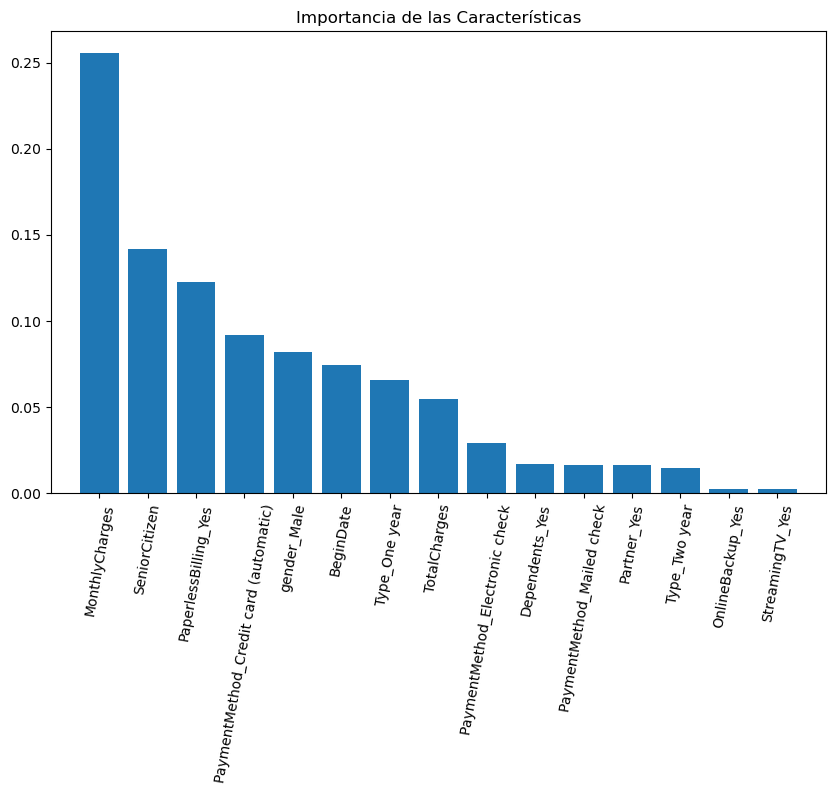

In [28]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = TV_features.columns

n = 15
plt.figure(figsize=(10, 6))

plt.title("Importancia de las Características")


plt.bar(range(n), importances[indices[:n]])
plt.xticks(range(n), feature_names[indices[:n]], rotation=80)
plt.xlim([-1, n])
plt.show()

Observacuiones:
- Boruta selecciono diez caracteristicas.
- La importancia de las caracteristicas disminuye a la mitad a partir de la cuarta caracteristica, asi que consideramos la decisión de boruta apropiada.

## Analisís de los datos:

A partir de ahora desarrollaremos los modelos de ML con las caracteristicas trabajadas hasta ahora.
Aqui comienza la solución de la asignación principal:


### Generar modelos de Machine Learning:
Generaremos seis modelos, estos sera, evaluados a través de cross validation usando los dataframe de test y validacion (TV): "TV_features" y "TV_target". Para este objetivo definiremos la siguiente función:


In [36]:
def cv_model_pipeline(pipeline, X, y, cv_splits=5, scoring='accuracy'):
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring)
    
    print("Cross-validation scores:", scores)
    print("Mean score:", scores.mean())
    return scores


Esta función evalua con cross validatión, a la vez que llama al pipeline de escalado de datos, teniendo un escalado propio en cada sección de la validación cruzada, evitando el data leakage y mateniendo una evaluación robusta.

#### Modelo Dummy:
para este caso usamos una división de datos, en train y valid:



In [49]:
dummy = DummyClassifier(strategy='most_frequent')


cv_model_pipeline(pipeline(dummy), features_ohe_resampled, target_resampled)



Cross-validation scores: [0.48575828 0.49730562 0.48767334 0.48613251 0.49075501]
Mean score: 0.4895249516340055


array([0.48575828, 0.49730562, 0.48767334, 0.48613251, 0.49075501])

Este valor nos sirve como prueba de cordura, para saber si los siguientes modelos son buenos o no.


#### Arbol de decisiones:




In [ ]:
def cross_val_arbol(X, y):
    scores = cross_val_score(DecisionTreeClassifier(random_state=42),
                             X, y, cv=5, scoring='accuracy')
    return scores.mean()

arbol_score = cross_val_arbol(features_train, target_train)
print(f"El puntuaje del arbol de decisiones es: {arbol_score}")


#### Random Forest:


#### Regresión Logística

#### Decenso de gradiente

### Evaluación de los modelos:


#### Curva ROC

#### Valor PR

#### Exploración de resultados:

### Exploración del mejor modelo:

#### Puntuajes

#### Curva ROC

#### Curva PR

## Observaciones y Conclusiones

# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

¡Omar, tu proyecto ya es muy sólido y tiene una estructura excelente para el análisis y modelado de datos! 🚀 Honestamente, podríamos aprobarlo en este punto, ya que cumple con los requisitos esenciales. Sin embargo, creo que podrías beneficiarte de obtener un poco de feedback adicional para perfeccionar algunos detalles antes de avanzar.

### Lo que se Está Haciendo Bien:
1. **Análisis Exploratorio de Datos (EDA) Completo**: Has realizado un EDA exhaustivo que aborda la calidad de los datos y te da un buen punto de partida. ¡Excelente trabajo en identificar variables importantes y planificar el preprocesamiento!
2. **Pre-procesamiento de Datos**: Me gusta cómo has abordado problemas específicos, como la codificación y los tipos de datos incorrectos. Este nivel de detalle asegura que tu dataset esté en óptimas condiciones para el modelado.
3. **Planificación de Modelos**: Considerar múltiples enfoques, desde modelos básicos hasta algoritmos más avanzados, muestra una estrategia robusta. ¡Gran elección al evaluar diferentes métodos!
4. **Evaluación Completa**: Incluir métricas como la curva ROC y el valor PR te permitirá evaluar a fondo el rendimiento de los modelos, y me alegra ver que estás considerando estas medidas.

### Áreas de Mejora y Consideraciones Adicionales:
1. **Selección de Características**: Aunque tu análisis es muy bueno, podrías explorar técnicas avanzadas para afinar la selección de variables. Podrías investigar métodos como **embedding, wrapping y filtering**:
   - **Filtering**: Basado en criterios estadísticos independientes del modelo.
   - **Wrapping**: Utiliza el rendimiento del modelo para seleccionar características.
   - **Embedding**: Se realiza dentro del propio proceso de entrenamiento del modelo.
   - Herramientas como **SHAP** o **Boruta** podrían ofrecerte insights valiosos. Esto dependerá del tiempo que tengas para implementar estas ideas.
2. **Evaluación de Tiempo**: Utilizar `timeit` para medir el tiempo de ejecución de tus procesos podría ser muy útil, especialmente si trabajas con datasets extensos. Esto no es obligatorio, pero es una práctica recomendada para proyectos de gran envergadura.
3. **Balance de Clases**: Te sugiero detallar más tu enfoque para balancear las clases, explicando las técnicas que planeas usar, como **SMOTE** o **undersampling**, y por qué las seleccionaste. Esto aportará más claridad a tu metodología.

### Reflexión Final:
Tu proyecto es impresionante y está listo para destacarse. Estas sugerencias son opcionales y dependen de tu disponibilidad de tiempo para integrarlas. Si decides implementarlas, podrían enriquecer aún más tu análisis y hacer tu proyecto más robusto.

**Si no decides agregar estas mejoras, puedes simplemente regresar el proyecto tal y como está, y lo aprobaré inmediatamente.** De cualquier forma, ¡has hecho un gran trabajo hasta ahora!

¡Sigue con ese entusiasmo y pasión por aprender! Este proyecto te está preparando muy bien para una carrera exitosa en ciencia de datos, y estoy seguro de que te abrirá muchas oportunidades. 🌟😊 ¡Mucho éxito y sigue adelante con confianza!
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hesus, te agradezco las observaciones y recomendaciones, puse en practica varias y deje afuera otras, sin embargo espero seguir itereando el proyecto en las siguientes etapas.


    
</div>

# Comentario de Segunda Iteración

<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho!  &#128077;  Podemos aprobar el proyecto. <br>
Has demostrado un excelente conocimiento en la construcción de modelos, al eliminar variables innecesaria <br>
<br>Quiero felicitarte por un trabajo excepcional y por la calidad de tu análisis. Te animo a que sigas aprendiendo y desafiando tu potencial en los próximos sprints. Estoy seguro de que tus habilidades y conocimientos serán valiosos en el futuro y te permitirán abordar problemas cada vez más complejos con éxito.
</div>